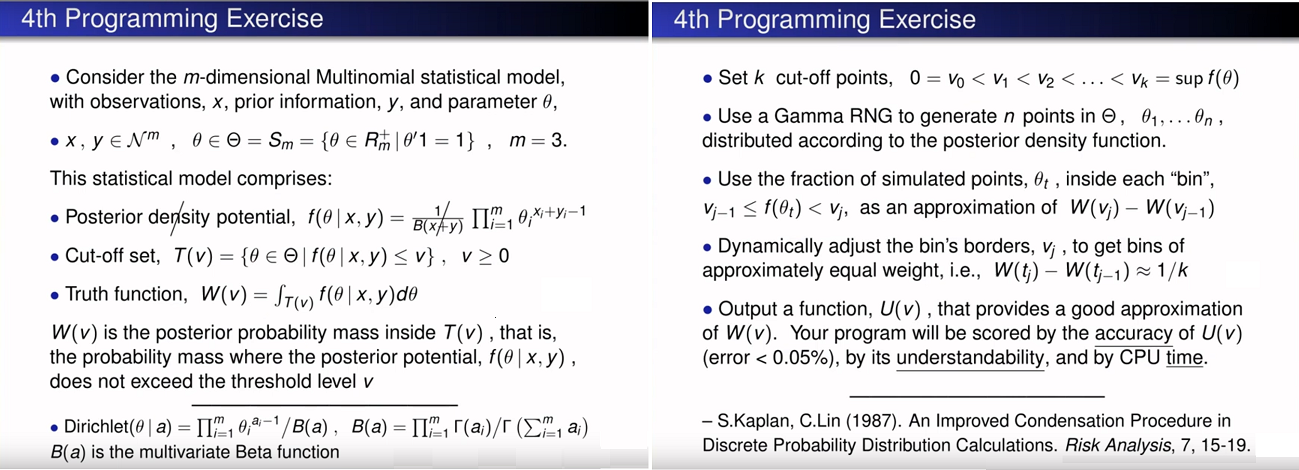

In [43]:
#*******************************************************************************
# EP4 - MAP2212
# Nikolas Lukin
# Nusp-5381328
# Vinicius Collaço
# Nusp-11811012
#*******************************************************************************

#!/usr/bin/env python3
# -*- coding: utf-8 -*-

#Bibliotecas
import random
import numpy as np
import matplotlib.pyplot as plt
from scipy.special import gamma

#Escreva seus nomes e numeros USP
INFO = {5381328:"Nikolas Lukin",11811012:"Vinícius Collaço"}

class Estimador:
  """Classe para criar o objeto, ele recebe valores para os vetores x e y.
  Os metodos definidos abaixo serao utilizadas por um corretor automatico. 
  Portanto, precisa manter os outputs e inputs dos 2 metodos abaixo. 
  """
  
  def __init__(self,x,y):
    """Inicializador do objeto. Este metodo recebe 
    valores pros vetores x e y em formato de lista 
    e implementa no objeto. 
    """
    
    self.vetor_x = np.array(x) #formato: [0,0,0] - List cujo len(x) = 3
    self.vetor_y = np.array(y) #formato: [0,0,0] - List cujo len(y) = 3

    self.n = 15366400 #Definido no relatorio
    self.k = 4000 #Numero de bins definido no relatorio
    self.alpha = self.vetor_x + self.vetor_y

    #calcula a constante de normalização
    beta = (np.prod(gamma(self.alpha))) / (gamma(sum(self.alpha)))
    self.const_norm = 1/beta

    self.f_ordenada = self.f_norm_ord()
    self.f_min = self.f_norm_ord()[0]
    self.f_max = self.f_norm_ord()[-1]

    self.f_bins = self.f_bins()
    
  def U(self,v):
    """Este metodo recebe um valor para v e, a partir dele, retorna U(v|x,y) 
    a partir dos vetores x e y inicializados anteriormente
    """
    f_ordenado = self.f_bins

    if v > self.f_max:
      return 1
    if v < self.f_min:
      return 0  

    # numero de bins abaixo de um certo v
    menor_que_v = np.searchsorted(f_ordenado, v, side='left')
    u = menor_que_v/self.k

    return u

    ############################################################################
    # Escreva aqui embaixo qualquer outro metodo ou funcao que voce queira utilizar no
    # exercício. Pedimos que mantenha o nome dos metodos ja definidos acima, 
    # os inputs do __init__() e do U() precisam ser mantidos iguais, assim como
    # os outputs.
    # ela implemente a estimativa U(v). Esse formato utilizado e demonstrado no
    # main sera utilizado pelo corretor automativo.
    # 
    # Exemplo de funcionamento do corretor:
    # 
    #           from EP04 import estimador
    #           estimativa_do_aluno = estimador([1,2,3],[4,5,6])
    #           if abs(estimativa_do_aluno.U(7) - W(7)) <= 0.0005:
    #               print("Parabens, mais 5 na nota") 
    #           if abs(estimativa_do_aluno.U(0.2) - W(0.2)) <= 0.0005:
    #               print("Parabens, mais 5 na nota")
    # 
    ############################################################################

    # Dica: Tente implementar o Estimador() de tal forma que a inicializacao seja
    # demorada, mas a chamada do metodo U(v) seja rapida. Ou seja, tente implementar
    # o maximo possivel do exercicio sem utilizar o valor de v. Desta forma, voce
    # pode acelerar o calculo de estimativas U(v) para diferentes valores de v 
    # sem precisar repetir todo o procedimento do exercicio para cada novo v.

  def f(self):
    """metodo para gerar o array f(theta)"""

    theta = np.random.dirichlet (self.alpha, self.n)
    f = np.prod(np.power(theta, self.alpha - 1), axis=1)
    return f

  def f_norm_ord(self):
    """metodo para normalizar e ordenar f"""

    f = self.f()
    f.sort()
    f_normalizada = f*self.const_norm

    return f_normalizada

  def f_bins(self):
    """metodo para separar a f em bins"""

    f_normalizada = self.f_ordenada
    f_bins = [0]*self.k

    #Separa em bins com uma quantidade constante de pontos cada bin
    passo = int(self.n/self.k)

    for i in range (0,self.k):
        f_bins[i] = f_normalizada[i*passo]

    return f_bins

Segue um exemplo de funcionamento:
x = [4, 6, 4] e y = [1, 2, 3]
U( 0 ) =  0
U( 1 ) =  0.04125
U( 2 ) =  0.0905
U( 3 ) =  0.1435
U( 4 ) =  0.19875
U( 5 ) =  0.256
U( 6 ) =  0.315
U( 7 ) =  0.37525
U( 8 ) =  0.43675
U( 9 ) =  0.49925
U( 10 ) =  0.5625
U( 11 ) =  0.6265
U( 12 ) =  0.69175
U( 13 ) =  0.7575
U( 14 ) =  0.824
U( 15 ) =  0.89125
U( 16 ) =  0.95875
U( 17 ) =  1
Este exemmplo foi feito para demonstrar o funcionamento esperado do objeto


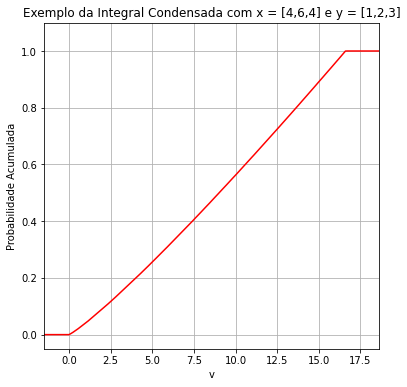

In [42]:
def main():
    #Coloque seus testes aqui
    x = [4,6,4]
    y = [1,2,3]
    estimativa = Estimador(x,y) 
    print("Segue um exemplo de funcionamento:")
    print("x =",x,"e y =",y)
    for i in range (int(estimativa.f_max + 2)):
      print("U(",i,") = ", estimativa.U(i))
    print("Este exemmplo foi feito para demonstrar o funcionamento esperado do objeto")

    #Plotando U(v)
    v = np.arange (-2,estimativa.f_max+3,0.05)
    probabilidade_acumulada = [estimativa.U(i) for i in v]
    
    fig, ax = plt.subplots(figsize=(6,6))
    ax.plot(v,probabilidade_acumulada,color='r')
    ax.set(xlabel='v', ylabel='Probabilidade Acumulada',
           title='Exemplo da Integral Condensada com x = [4,6,4] e y = [1,2,3]')
    plt.axis([-1.5, estimativa.f_max+2, -0.05, 1.1])
     
    ax.grid()
    plt.show()
    fig.savefig('Integral.png')

if __name__ == "__main__":
    main()